<a href="https://colab.research.google.com/github/Anhsirk6khaos/Anhsirk6khaos/blob/main/Problem5_Trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install adversarial-robustness-toolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# Imports
import keras
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, UniversalPerturbation, SaliencyMapMethod
from art.estimators.classification import KerasClassifier

# Set the random seeds. DO NOT CHANGE THIS!
seedVal = 41
random.seed(seedVal)
np.random.seed(seedVal)

# Defining some constants
NUM_CLASSES = 10
BATCH_SIZE = 64

In [19]:
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

## Setting up things

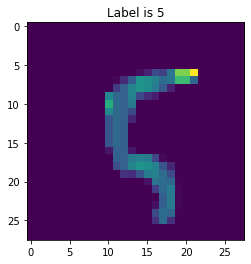

In [20]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

# Plot an example image (after normalization) from the train set
plt.title('Label is {}'.format(y_train[100]))
plt.imshow(x_train[100])
plt.show()

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

K.set_image_data_format('channels_last')
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## Train CNN based model

### You need to complete the following.

In [21]:
# Define the CNN network architecture. 
cnn_based_model = Sequential()

# Define the intermediate layers.
cnn_based_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn_based_model.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn_based_model.add(Flatten())

cnn_based_model.add(Dense(NUM_CLASSES, activation='softmax'))

In [23]:
# Compile the CNN model. 
cnn_based_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_based_classifier = KerasClassifier(model=cnn_based_model, clip_values=(0,1))
cnn_based_classifier.fit(x_train, y_train, nb_epochs=5, batch_size=BATCH_SIZE)

# Get the predictions on the test set.
predictions_cnn = cnn_based_classifier.predict(x_test)

# Compute the accuracy on the test set.
y_test_arg_cnn=np.argmax(y_test,axis=1)
Y_pred_cnn = np.argmax(cnn_based_classifier.predict(x_test),axis=1)
cnn_based_score = accuracy_score(y_test_arg_cnn, Y_pred_cnn)

print('Test accuracy:', cnn_based_score)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.1816 - accuracy: 0.9479
Epoch 2/5
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0600 - accuracy: 0.9819
Epoch 3/5
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.0409 - accuracy: 0.9871
Epoch 4/5
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.0293 - accuracy: 0.9906
Epoch 5/5
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.0208 - accuracy: 0.9933


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Test accuracy: 0.9829


## Train ANN based model (dense layers only)

### You need to complete the following.

In [24]:
# Define the ANN network architecture.
# Define the intermediate layers.
ann_based_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
  tf.keras.layers.Dense(300, activation = 'sigmoid'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [25]:
# Compile the ANN model. 
ann_based_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator


In [26]:
ann_based_classifier = KerasClassifier(model=ann_based_model, clip_values=(0,1))
results=ann_based_classifier.fit(x_train, y_train, nb_epochs=10, batch_size=BATCH_SIZE)

# Get the predictions on the test set.
predictions = ann_based_classifier.predict (x_test)

# Compute the accuracy on the test set.
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(ann_based_classifier.predict(x_test),axis=1)

ann_score = accuracy_score(y_test_arg, Y_pred)


print('Test accuracy:', ann_score)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5178 - accuracy: 0.8696
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2745 - accuracy: 0.9205
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2219 - accuracy: 0.9349
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1835 - accuracy: 0.9468
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1532 - accuracy: 0.9553
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1302 - accuracy: 0.9623
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1113 - accuracy: 0.9673
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0958 - accuracy: 0.9720
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0831 - accuracy: 0.9760
Epoch 10/10
60

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Test accuracy: 0.9685


## Compare the classification accuracy on the test data graphically

### You need to complete the following.

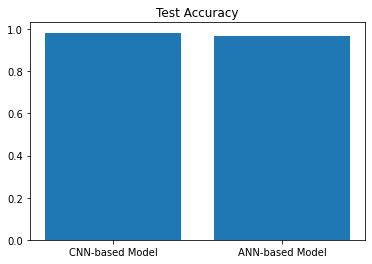

In [27]:
X = ['CNN-based Model','ANN-based Model']
Y = [cnn_based_score, ann_score]
plt.bar(X,Y)
plt.title('Test Accuracy')
plt.show()
plt.close()

## Part 2: Generate adversarial examples using four methods

### You need to complete the following.

In [28]:
def generate_adv_examples_FGSM(classifier, x):
    # This attack is known as the "Fast Gradient Sign Method".
    epsilon = 0.1
    adv_crafter1 = FastGradientMethod(classifier, eps=epsilon)
    attack1 = adv_crafter1.generate(x=x_test)
    return attack1

def generate_adv_examples_BasicIterativeMethod(classifier, x):
    # The Basic Iterative Method is the iterative version of FGM and FGSM.
    epsilon = 0.1
    adv_crafter2 = BasicIterativeMethod(classifier, eps=epsilon)
    attack2 = adv_crafter2.generate(x=x_test)
    return attack2

def generate_adv_examples_SaliencyMapMethod(classifier, x):
    # attack from the Jacobian-based Saliency Map Attack (Papernot et al. 2016).
    # Paper link: https://arxiv.org/abs/1511.07528
    adv_crafter3 = SaliencyMapMethod(classifier)
    attack3 = adv_crafter3.generate(x=x_test)
    return attack3

def generate_adv_examples_UniversalPerturbation(classifier, x):
    epsilon = 0.1
    adv_crafter4 = UniversalPerturbation(classifier, eps=epsilon)
    attack4 = adv_crafter4.generate(x=x_test)
    return attack4

In [ ]:
# Generate examples for CNN-based model
cnn_adv_examples_FGSM = generate_adv_examples_FGSM(cnn_based_classifier, x_test)
cnn_adv_examples_BasicIterativeMethod = generate_adv_examples_BasicIterativeMethod(cnn_based_classifier, x_test)


PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
cnn_adv_examples_SaliencyMapMethod = generate_adv_examples_SaliencyMapMethod(cnn_based_classifier, x_test)
cnn_adv_examples_UniversalPerturbation = generate_adv_examples_UniversalPerturbation(cnn_based_classifier, x_test)

# Generate plot
fig, ax = plt.subplots(8, 4, sharex='col', sharey='row', figsize=(15,15))
fig.suptitle('Adversarial examples generated for the CNN-based model')
cnn_adv_examples = [cnn_adv_examples_FGSM, cnn_adv_examples_BasicIterativeMethod, cnn_adv_examples_SaliencyMapMethod, cnn_adv_examples_UniversalPerturbation]

for i in range(8):
    for j in range(4):
        ax[i, j].imshow(cnn_adv_examples[j][i].squeeze())
        predictions = cnn_based_classifier.predict(np.expand_dims(cnn_adv_examples[j][i], 0))
        ax[i, j].set_title('Network Prediction: {}'.format(np.argmax(predictions)))

JSMA:   0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
# Generate examples for ANN-based model
ann_adv_examples_FGSM = None
ann_adv_examples_BasicIterativeMethod = None
ann_adv_examples_SaliencyMapMethod = None
ann_adv_examples_UniversalPerturbation = None

# Generate plots
fig, ax = plt.subplots(8, 4, sharex='col', sharey='row', figsize=(15,15))
fig.suptitle('Adversarial examples generated for the ANN-based model')
ann_adv_examples = None

for i in range(8):
    for j in range(4):
        ax[i, j].imshow(ann_adv_examples[j][i].squeeze())
        predictions = ann_based_classifier.predict(np.expand_dims(ann_adv_examples[j][i], 0))
        ax[i, j].set_title('Network Prediction: {}'.format(np.argmax(predictions)))

## Part 3: Create a new test set, based entirely on the adversarial images generated previously. Test your classifiers performance on this test set.

### You need to complete the following.

In [ ]:
# We will be using the FGSM method in this part
ann_adv_examples_FGSM = None
cnn_adv_examples_FGSM = None

In [ ]:
# Evaluate ANN-based-classifier on the newly generated adversarial test set
predictions = None
ann_based_score = None
print('ANN-based Model Score: {}'.format(ann_based_score))

In [ ]:
# Evaluate CNN-based-classifier on the newly generated adversarial test set
predictions = None
cnn_based_score = None
print('CNN-based Model Score: {}'.format(cnn_based_score))

## Create a new augmented test set (original test images + adversarial images)


### You need to complete the following.

In [ ]:
# ANN-based-classifier
ann_augmented_examples = []
for i in range(10000):
    
    # Select adversarial samples.
    if random.randint(0, 1) == 0:
        None
    # Select actual samples.
    else:
        None
        
ann_augmented_examples = np.concatenate(ann_augmented_examples, axis=0)

predictions = None
ann_based_score = None
print('ANN-based Model Score: {}'.format(ann_based_score))

In [ ]:
# CNN-based-classifier
cnn_augmented_examples = []
for i in range(10000):
    
    # Select adversarial samples.
    if random.randint(0, 1) == 0:
        None
    # Select actual samples.
    else:
        None

cnn_augmented_examples = np.concatenate(cnn_augmented_examples, axis=0)

predictions = None
cnn_based_score = None
print('CNN-based Model Score: {}'.format(cnn_based_score))

## Make a single plot, wherein you compare the test accuracies of all the models, on the three types of test sets that you have

### You need to complete the following.

In [ ]:
ann_models_score = None
cnn_models_score = None

In [ ]:
# Plot for the ANN based model.
X = ['Original Test Set','Augmented Test Set', 'Adversarial Test Set']
plt.bar(None, color=['r', 'g', 'b'])
plt.title('Test Accuracy for the ANN-based model')
plt.show()
plt.close()

In [ ]:
# Plot for the CNN based model.
X = ['Original Test Set','Augmented Test Set', 'Adversarial Test Set']
plt.bar(None, color=['r', 'g', 'b'])
plt.title('Test Accuracy for the CNN-based model')
plt.show()
plt.close()